In [89]:
import pandas as pd
import time
import numpy as np
import sqlite3

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.cross_validation import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import explained_variance_score, mean_absolute_error, silhouette_score
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pydot
from IPython.display import Image
from pylab import rcParams

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import sys, os
# reload(sys)
# sys.setdefaultencoding('utf-8')

In [3]:
con = sqlite3.connect("airports.sqlite")
con.text_factory = str

In [4]:
operations=pd.read_csv('../assets/Airport_operations.csv')
cancellations=pd.read_csv('../assets/airport_cancellations.csv')
airports=pd.read_csv('../assets/airports.csv')

In [5]:
airports.columns = [('A_'+column.replace(' ', '_')) for column in airports.columns]
cancellations.columns = [('C_'+column.replace(' ', '_')) for column in cancellations.columns]
operations.columns = [('O_'+column.replace(' ', '_')) for column in operations.columns]

In [6]:
airports

,A_Key,A_LocID,A_AP_NAME,A_ALIAS,A_Facility_Type,A_FAA_REGION,A_COUNTY,A_CITY,A_STATE,A_AP_Type,A_Latitude,A_Longitude,A_Boundary_Data_Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,5088.0,X64,PATILLAS,NaN,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.019330,No
2,2886.0,PSE,MERCEDITA,Aeropuerto Mercedita,Airport,ASO,#NAME?,PONCE,PR,Public Use,18.008306,-66.563028,Yes
3,2879.0,VQS,ANTONIO RIVERA RODRIGUEZ,Aeropuerto Antonio Rivera Rodr�guez,Airport,ASO,#NAME?,ISLA DE VIEQUES,PR,Public Use,18.134811,-65.493617,Yes
4,2883.0,X63,HUMACAO,Aeropuerto Regional De Humacao,Airport,ASO,#NAME?,HUMACAO,PR,Public Use,18.138017,-65.800718,Yes
5,2884.0,RVR,JOSE APONTE DE LA TORRE,Aeropuerto Jos� Aponte De La Torre,Airport,ASO,#NAME?,CEIBA,PR,Public Use,18.245269,-65.643381,Yes
6,2881.0,MAZ,EUGENIO MARIA DE HOSTOS,Aeropuerto Eugenio Mar�a De Hostos,Airport,ASO,#NAME?,MAYAGUEZ,PR,Public Use,18.255694,-67.148472,Yes
7,5087.0,X95,DIEGO JIMENEZ TORRES,NaN,Airport,ASO,#NAME?,FAJARDO,PR,Public Use,18.308010,-65.661828,No
8,5086.0,CPX,BENJAMIN RIVERA NORIEGA,NaN,Airport,ASO,#NAME?,ISLA DE CULEBRA,PR,Public Use,18.313289,-65.304324,No
9,3442.0,STT,CYRIL E KING,Cyril E King International Airport,Airport,ASO,-VIRGIN ISLANDS-,CHARLOTTE AMALIE,VI,Public Use,18.337306,-64.973361,Yes


In [7]:
airports.to_sql('airports', con, if_exists='replace', index=False)

In [8]:
operations

,O_airport,O_year,O_departures_for_metric_computation,O_arrivals_for_metric_computation,O_percent_on-time_gate_departures,O_percent_on-time_airport_departures,O_percent_on-time_gate_arrivals,O_average_gate_departure_delay,O_average_taxi_out_time,O_average_taxi_out_delay,O_average_airport_departure_delay,O_average_airborne_delay,O_average_taxi_in_delay,O_average_block_delay,O_average_gate_arrival_delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48
5,ABQ,2009,42550,42704,0.8341,0.8147,0.8224,9.24,9.88,1.89,10.45,1.74,0.92,1.98,9.27
6,ABQ,2010,42302,42169,0.8144,0.7907,0.8047,10.25,9.95,2.05,11.58,1.66,0.95,1.90,10.23
7,ABQ,2011,42283,42297,0.8072,0.7758,0.8022,10.81,10.50,2.51,12.57,1.58,0.84,1.87,10.63
8,ABQ,2012,39105,39107,0.8219,0.7940,0.8177,10.55,10.27,2.32,12.11,1.41,0.98,1.80,9.73
9,ABQ,2013,35277,34989,0.7710,0.7402,0.7554,12.56,10.77,2.64,14.28,1.60,0.92,2.35,12.76


In [9]:
operations.to_sql('operations', con, if_exists='replace', index=False)

In [10]:
cancellations

,C_Airport,C_Year,C_Departure_Cancellations,C_Arrival_Cancellations,C_Departure_Diversions,C_Arrival_Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0
2,ABQ,2006.0,392.0,329.0,71.0,124.0
3,ABQ,2007.0,366.0,304.0,107.0,45.0
4,ABQ,2008.0,333.0,300.0,79.0,42.0
5,ABQ,2009.0,192.0,162.0,74.0,26.0
6,ABQ,2010.0,222.0,177.0,71.0,50.0
7,ABQ,2011.0,345.0,294.0,77.0,61.0
8,ABQ,2012.0,237.0,181.0,65.0,60.0
9,ABQ,2013.0,232.0,212.0,62.0,46.0


In [11]:
cancellations.to_sql('cancellations', con, if_exists='replace', index=False)

In [128]:
sql='''
SELECT 
    *
FROM
    (SELECT 
        airports.'A_LocID',
        airports.'A_FAA_REGION',
        airports.'A_AP_Type',
        cancellations.*
    FROM
        airports
    JOIN cancellations ON airports.A_LocID = cancellations.C_Airport) AS airport_cancellations
        JOIN
    operations ON airport_cancellations.A_LocID = operations.O_airport
        AND airport_cancellations.C_Year = operations.O_year
'''
data = pd.read_sql(sql, con)

In [129]:
data

,A_LocID,A_FAA_REGION,A_AP_Type,C_Airport,C_Year,C_Departure_Cancellations,C_Arrival_Cancellations,C_Departure_Diversions,C_Arrival_Diversions,O_airport,...,O_percent_on-time_airport_departures,O_percent_on-time_gate_arrivals,O_average_gate_departure_delay,O_average_taxi_out_time,O_average_taxi_out_delay,O_average_airport_departure_delay,O_average_airborne_delay,O_average_taxi_in_delay,O_average_block_delay,O_average_gate_arrival_delay
0,SJU,ASO,Federalized/Commercial,SJU,2004.0,330.0,289.0,55.0,28.0,SJU,...,0.7794,0.7984,11.19,13.84,2.27,12.43,1.88,0.79,3.39,12.28
1,SJU,ASO,Federalized/Commercial,SJU,2005.0,315.0,282.0,64.0,36.0,SJU,...,0.7464,0.7604,12.74,14.14,3.03,14.43,1.63,1.36,4.04,14.65
2,SJU,ASO,Federalized/Commercial,SJU,2006.0,257.0,233.0,63.0,44.0,SJU,...,0.7446,0.7611,11.61,15.75,4.28,14.34,1.73,1.29,4.19,14.17
3,SJU,ASO,Federalized/Commercial,SJU,2007.0,307.0,278.0,70.0,42.0,SJU,...,0.7522,0.7414,12.53,15.22,3.16,14.97,1.55,1.71,4.09,16.31
4,SJU,ASO,Federalized/Commercial,SJU,2008.0,238.0,197.0,78.0,29.0,SJU,...,0.7810,0.7533,12.54,14.22,1.85,13.59,1.64,1.25,3.75,15.18
5,SJU,ASO,Federalized/Commercial,SJU,2009.0,199.0,159.0,57.0,58.0,SJU,...,0.8015,0.7999,11.44,13.29,1.43,12.28,1.22,0.95,2.88,11.77
6,SJU,ASO,Federalized/Commercial,SJU,2010.0,258.0,207.0,82.0,45.0,SJU,...,0.7815,0.7719,12.21,13.04,1.39,13.00,1.65,1.32,3.53,13.40
7,SJU,ASO,Federalized/Commercial,SJU,2011.0,240.0,201.0,101.0,55.0,SJU,...,0.7934,0.7899,10.86,13.23,1.96,12.07,1.45,1.57,3.67,12.28
8,SJU,ASO,Federalized/Commercial,SJU,2012.0,174.0,141.0,62.0,41.0,SJU,...,0.8228,0.8181,9.55,13.15,1.82,10.55,1.41,1.33,2.89,10.64
9,SJU,ASO,Federalized/Commercial,SJU,2013.0,127.0,94.0,65.0,64.0,SJU,...,0.7808,0.7840,12.31,13.56,2.20,13.52,1.78,1.41,2.86,12.96


In [130]:
data.columns

Index([u'A_LocID', u'A_FAA_REGION', u'A_AP_Type', u'C_Airport', u'C_Year',
       u'C_Departure_Cancellations', u'C_Arrival_Cancellations',
       u'C_Departure_Diversions', u'C_Arrival_Diversions', u'O_airport',
       u'O_year', u'O_departures_for_metric_computation',
       u'O_arrivals_for_metric_computation',
       u'O_percent_on-time_gate_departures',
       u'O_percent_on-time_airport_departures',
       u'O_percent_on-time_gate_arrivals', u'O_average_gate_departure_delay',
       u'O_average_taxi_out_time', u'O_average_taxi_out_delay',
       u'O_average_airport_departure_delay', u'O_average_airborne_delay',
       u'O_average_taxi_in_delay', u'O_average_block_delay',
       u'O_average_gate_arrival_delay'],
      dtype='object')

Y is the `Average Airport Departure Delay`. This is the only feature I think is important for passengers and everything leads to that. Also `Percent on time airport departures` is almost the same. Therefore I'm going to remove them both. We can Also have another Y

In [131]:
y=data['O_average_airport_departure_delay']

In [132]:
x=data.drop(['C_Airport', 'O_airport', 
             'O_year','A_FAA_REGION',
             'A_AP_Type','A_LocID', 'C_Year', 
             'O_average_airport_departure_delay',
             'O_percent_on-time_airport_departures',
             'O_average_gate_departure_delay',
             'O_percent_on-time_gate_departures'
            ], axis=1)

In [133]:
x

,C_Departure_Cancellations,C_Arrival_Cancellations,C_Departure_Diversions,C_Arrival_Diversions,O_departures_for_metric_computation,O_arrivals_for_metric_computation,O_percent_on-time_gate_arrivals,O_average_taxi_out_time,O_average_taxi_out_delay,O_average_airborne_delay,O_average_taxi_in_delay,O_average_block_delay,O_average_gate_arrival_delay
0,330.0,289.0,55.0,28.0,60371,56735,0.7984,13.84,2.27,1.88,0.79,3.39,12.28
1,315.0,282.0,64.0,36.0,57736,54870,0.7604,14.14,3.03,1.63,1.36,4.04,14.65
2,257.0,233.0,63.0,44.0,55707,52948,0.7611,15.75,4.28,1.73,1.29,4.19,14.17
3,307.0,278.0,70.0,42.0,47987,47246,0.7414,15.22,3.16,1.55,1.71,4.09,16.31
4,238.0,197.0,78.0,29.0,44493,43448,0.7533,14.22,1.85,1.64,1.25,3.75,15.18
5,199.0,159.0,57.0,58.0,48418,46678,0.7999,13.29,1.43,1.22,0.95,2.88,11.77
6,258.0,207.0,82.0,45.0,47314,45781,0.7719,13.04,1.39,1.65,1.32,3.53,13.40
7,240.0,201.0,101.0,55.0,42803,42401,0.7899,13.23,1.96,1.45,1.57,3.67,12.28
8,174.0,141.0,62.0,41.0,44716,43985,0.8181,13.15,1.82,1.41,1.33,2.89,10.64
9,127.0,94.0,65.0,64.0,42902,42175,0.7840,13.56,2.20,1.78,1.41,2.86,12.96


In [134]:
faa_region=pd.get_dummies(data['A_FAA_REGION'], prefix='faa')
faa_region.head(1)

,faa_AAL,faa_ACE,faa_AEA,faa_AGL,faa_ANE,faa_ANM,faa_ASO,faa_ASW,faa_AWP
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [135]:
a_type=pd.get_dummies(data['A_AP_Type'], prefix='type')
a_type.head(1)

,type_Federalized/Commercial,type_Public Use
0,1.0,0.0


In [136]:
x=pd.concat([x, faa_region, a_type], axis=1)

In [67]:
x

,C_Departure_Cancellations,C_Arrival_Cancellations,C_Departure_Diversions,C_Arrival_Diversions,O_departures_for_metric_computation,O_arrivals_for_metric_computation,O_percent_on-time_gate_arrivals,O_average_taxi_out_time,O_average_taxi_out_delay,O_average_airborne_delay,...,faa_ACE,faa_AEA,faa_AGL,faa_ANE,faa_ANM,faa_ASO,faa_ASW,faa_AWP,type_Federalized/Commercial,type_Public Use
0,330.0,289.0,55.0,28.0,60371,56735,0.7984,13.84,2.27,1.88,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,315.0,282.0,64.0,36.0,57736,54870,0.7604,14.14,3.03,1.63,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,257.0,233.0,63.0,44.0,55707,52948,0.7611,15.75,4.28,1.73,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,307.0,278.0,70.0,42.0,47987,47246,0.7414,15.22,3.16,1.55,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,238.0,197.0,78.0,29.0,44493,43448,0.7533,14.22,1.85,1.64,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,199.0,159.0,57.0,58.0,48418,46678,0.7999,13.29,1.43,1.22,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,258.0,207.0,82.0,45.0,47314,45781,0.7719,13.04,1.39,1.65,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,240.0,201.0,101.0,55.0,42803,42401,0.7899,13.23,1.96,1.45,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,174.0,141.0,62.0,41.0,44716,43985,0.8181,13.15,1.82,1.41,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,127.0,94.0,65.0,64.0,42902,42175,0.7840,13.56,2.20,1.78,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


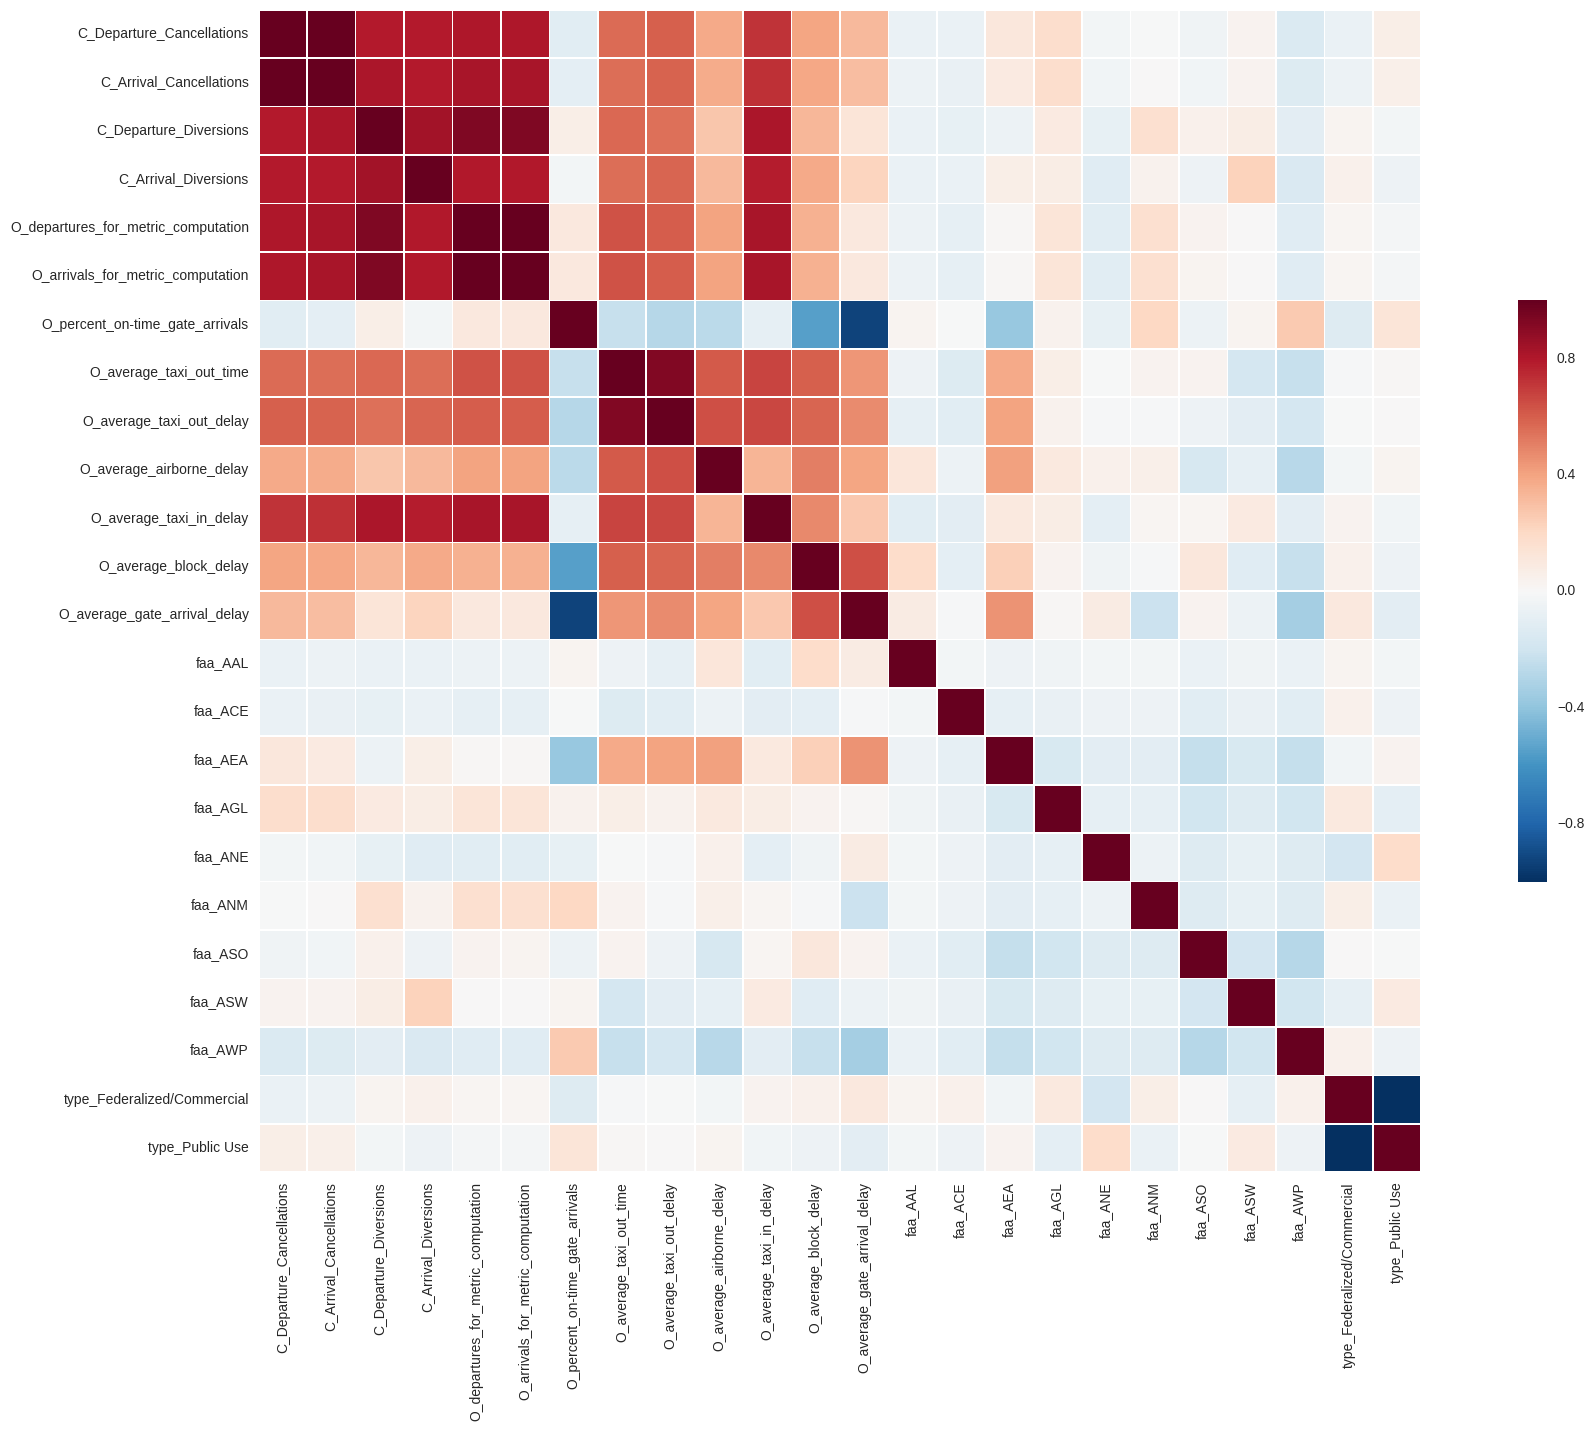

In [22]:
plt.figure(figsize=(25,15))
sns.heatmap(x.corr(), vmax=.3, square=True,
            linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
x.corr()

,C_Departure_Cancellations,C_Arrival_Cancellations,C_Departure_Diversions,C_Arrival_Diversions,O_departures_for_metric_computation,O_arrivals_for_metric_computation,O_percent_on-time_gate_arrivals,O_average_taxi_out_time,O_average_taxi_out_delay,O_average_airborne_delay,...,faa_ACE,faa_AEA,faa_AGL,faa_ANE,faa_ANM,faa_ASO,faa_ASW,faa_AWP,type_Federalized/Commercial,type_Public Use
C_Departure_Cancellations,1.000000,0.997464,0.796385,0.792253,0.808959,0.809994,-0.113363,0.566103,0.599671,0.376828,...,-0.069957,0.109628,0.175480,-0.031119,-0.007807,-0.043995,0.036778,-0.144686,-0.062993,0.062993
C_Arrival_Cancellations,0.997464,1.000000,0.814378,0.793773,0.823676,0.824622,-0.094130,0.559625,0.588159,0.367273,...,-0.075860,0.088099,0.179474,-0.037792,0.006725,-0.035929,0.036940,-0.139853,-0.057921,0.057921
C_Departure_Diversions,0.796385,0.814378,1.000000,0.840401,0.934147,0.934035,0.067575,0.571622,0.554316,0.280685,...,-0.084732,-0.061180,0.088135,-0.082173,0.159225,0.051881,0.072087,-0.103698,0.026345,-0.026345
C_Arrival_Diversions,0.792253,0.793773,0.840401,1.000000,0.798750,0.799456,-0.028064,0.558053,0.581730,0.322749,...,-0.068370,0.064986,0.077496,-0.118593,0.040576,-0.047025,0.232455,-0.152526,0.052181,-0.052181
O_departures_for_metric_computation,0.808959,0.823676,0.934147,0.798750,1.000000,0.999807,0.103680,0.638656,0.604125,0.401505,...,-0.088737,0.014196,0.130494,-0.110107,0.161535,0.032944,0.006166,-0.121686,0.020556,-0.020556
O_arrivals_for_metric_computation,0.809994,0.824622,0.934035,0.799456,0.999807,1.000000,0.104228,0.636674,0.603439,0.400179,...,-0.087682,0.015344,0.132095,-0.111841,0.159976,0.029601,0.007365,-0.118813,0.021347,-0.021347
O_percent_on-time_gate_arrivals,-0.113363,-0.094130,0.067575,-0.028064,0.103680,0.104228,1.000000,-0.230311,-0.287357,-0.271240,...,-0.003503,-0.376222,0.041562,-0.085838,0.210340,-0.055615,0.026732,0.264872,-0.132126,0.132126
O_average_taxi_out_time,0.566103,0.559625,0.571622,0.558053,0.638656,0.636674,-0.230311,1.000000,0.923359,0.611870,...,-0.134108,0.377042,0.065552,-0.000846,0.035098,0.038047,-0.177654,-0.233074,-0.013195,0.013195
O_average_taxi_out_delay,0.599671,0.588159,0.554316,0.581730,0.604125,0.603439,-0.287357,0.923359,1.000000,0.642913,...,-0.113627,0.403888,0.039996,-0.010440,-0.009054,-0.047589,-0.107567,-0.174263,-0.006821,0.006821
O_average_airborne_delay,0.376828,0.367273,0.280685,0.322749,0.401505,0.400179,-0.271240,0.611870,0.642913,1.000000,...,-0.058552,0.412229,0.094937,0.048701,0.055131,-0.164284,-0.090102,-0.274128,-0.029160,0.029160


In [25]:
def get_cv(target):
    return StratifiedKFold(target, n_folds=3, shuffle=True, random_state=41)

def score(model, data, target):
    model.fit(data, target)
    
    return model.score(data, target)
def grid_search(model, params, cv):
    return GridSearchCV(estimator=model, 
                    param_grid=params,
                    cv=cv
                   )
def check_regression_results(y_true, y_pred):
    print ("Explained variance regression score: ", 
           explained_variance_score(y_true, y_pred, multioutput='uniform_average'))
    print "Mean Absolute Error:", mean_absolute_error(y_true, y_pred)

def draw_feature_importance(model, data):
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]
    feature_names = data.columns
    # Plot the feature importances of the model
    rcParams['figure.figsize'] = 12, 8
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(data.shape[1]), importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(data.shape[1]), feature_names[indices], rotation=90)
    plt.xlim([-1, data.shape[1]])
    plt.show()

def model_test_metrics(model, data, target):
    print "Test Data score: ", model.fit(data, target).score(data, target)
    check_regression_results(target, model.predict(data))

def evaluate_model(model, data, target, params=None, draw_features=True, verbose=True):
    train_data, test_data, train_target, test_target=train_test_split(data, target)
#     print score(model, train_data, train_target), "\n"
    cv=get_cv(train_target)
    if params:
        grid=grid_search(model, params, cv)
    
        grid.fit(train_data, train_target)
        model = grid.best_estimator_
        if verbose:
            print "Best Model after Grid Search:\n", model
        
    else:
        model.fit(train_data, train_target)
        
    s=cross_val_score(model, train_data, train_target, cv=cv, n_jobs=-1)
    if verbose:
        print "Mean score of the model is: {}".format(s.mean())
        predictions = model.predict(test_data)
        check_regression_results(test_target, predictions)

    if draw_features:
        draw_feature_importance(model, train_data)
    return model

In [26]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3)

/home/ali/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


Best Model after Grid Search:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Mean score of the model is: 0.827876425941
('Explained variance regression score: ', 0.88452915113944242)
Mean Absolute Error: 1.33042857143


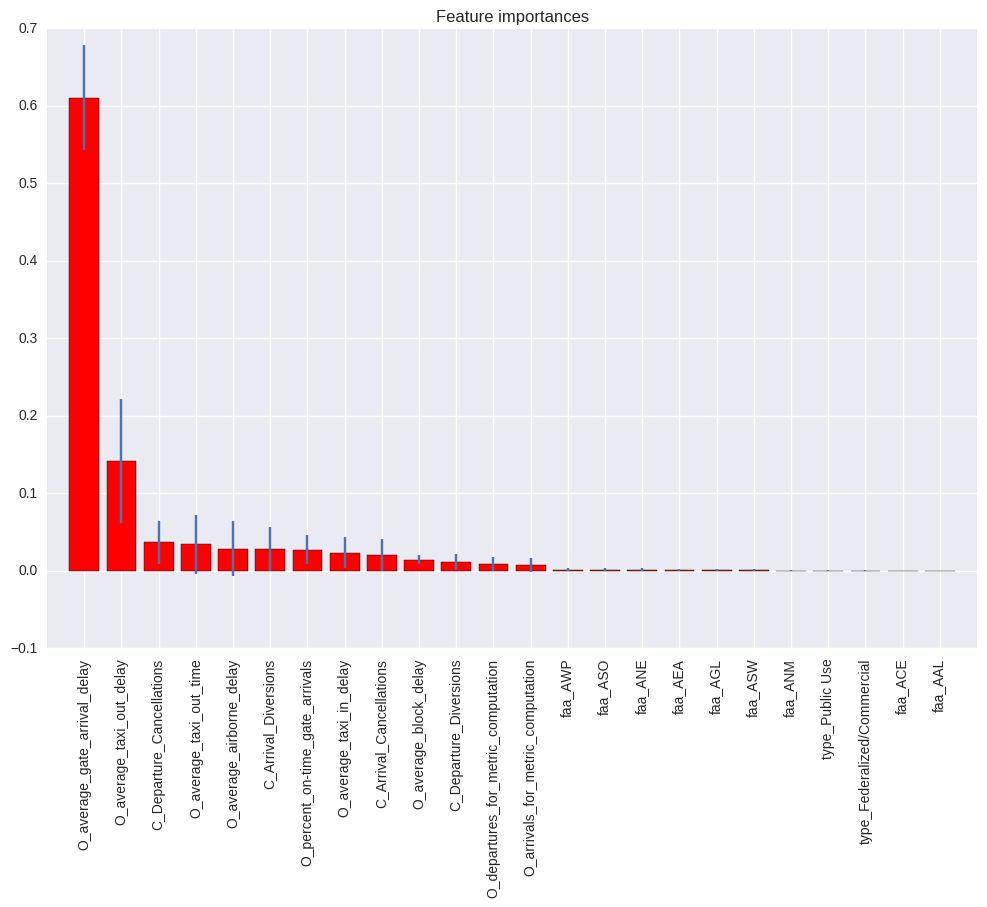

This operation took 197.871471882 seconds


In [27]:
params = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [None,1, 2, 3, 4, 5],
    'min_samples_split': [2, 10, 25, 50, 100],
#     'min_samples_leaf': [1, 2, 3, 4, 5, 10]
}
start_time = time.time()
rf=evaluate_model(RandomForestRegressor(n_jobs=-1), x_train, y_train, params)
print 'This operation took '+ str(time.time() - start_time) + " seconds"

In [28]:
model_test_metrics(rf, x_test, y_test)

Test Data score:  0.980106022086
('Explained variance regression score: ', 0.98013698987102305)
Mean Absolute Error: 0.450162083333


Best Model after Grid Search:
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=100, n_jobs=-1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)
Mean score of the model is: 0.874522425218
('Explained variance regression score: ', 0.90260288920631238)
Mean Absolute Error: 1.08093642857


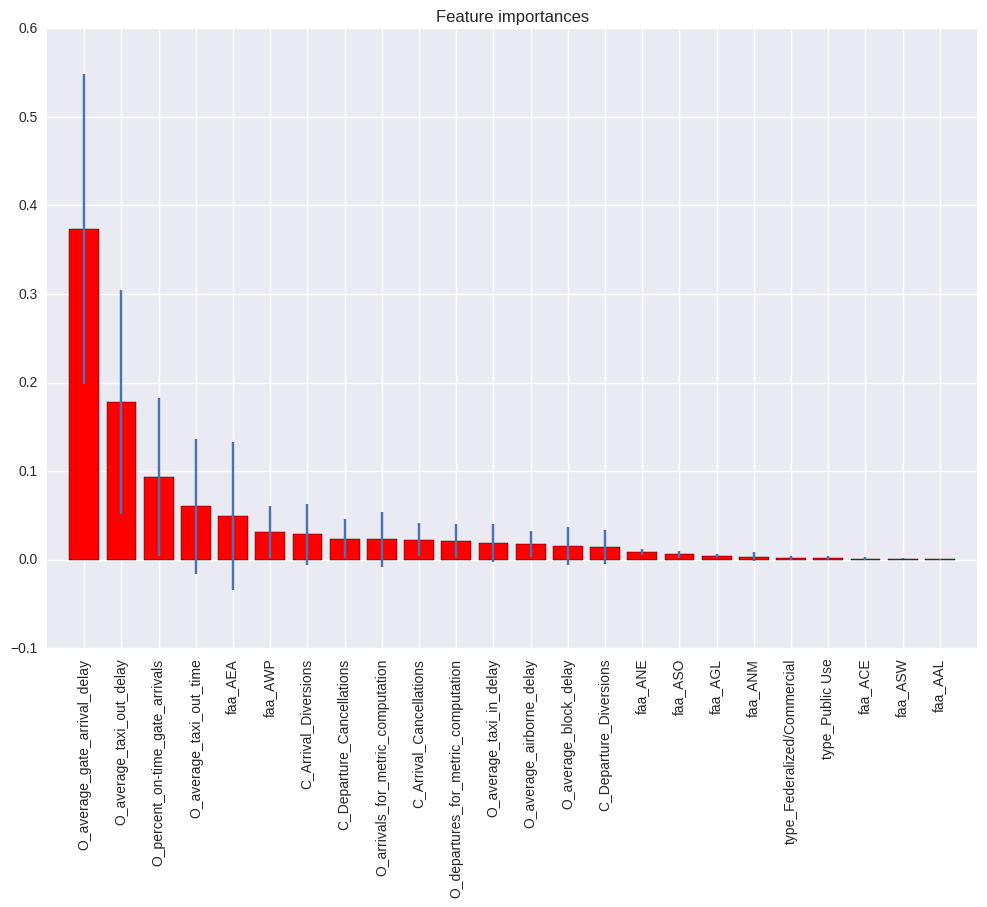

This operation took 185.317203999 seconds


In [29]:
params = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [None,1, 2, 3, 4, 5],
    'min_samples_split': [2, 10, 25, 50, 100],
}
start_time = time.time()
et=evaluate_model(ExtraTreesRegressor(n_jobs=-1), x_train, y_train, params)
print 'This operation took '+ str(time.time() - start_time) + " seconds"

In [30]:
model_test_metrics(et, x_test, y_test)

Test Data score:  1.0
('Explained variance regression score: ', 1.0)
Mean Absolute Error: 1.77043564994e-14


In [31]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x)

In [32]:
display_x = pd.concat([x, pd.DataFrame(x_pca)], axis=1)

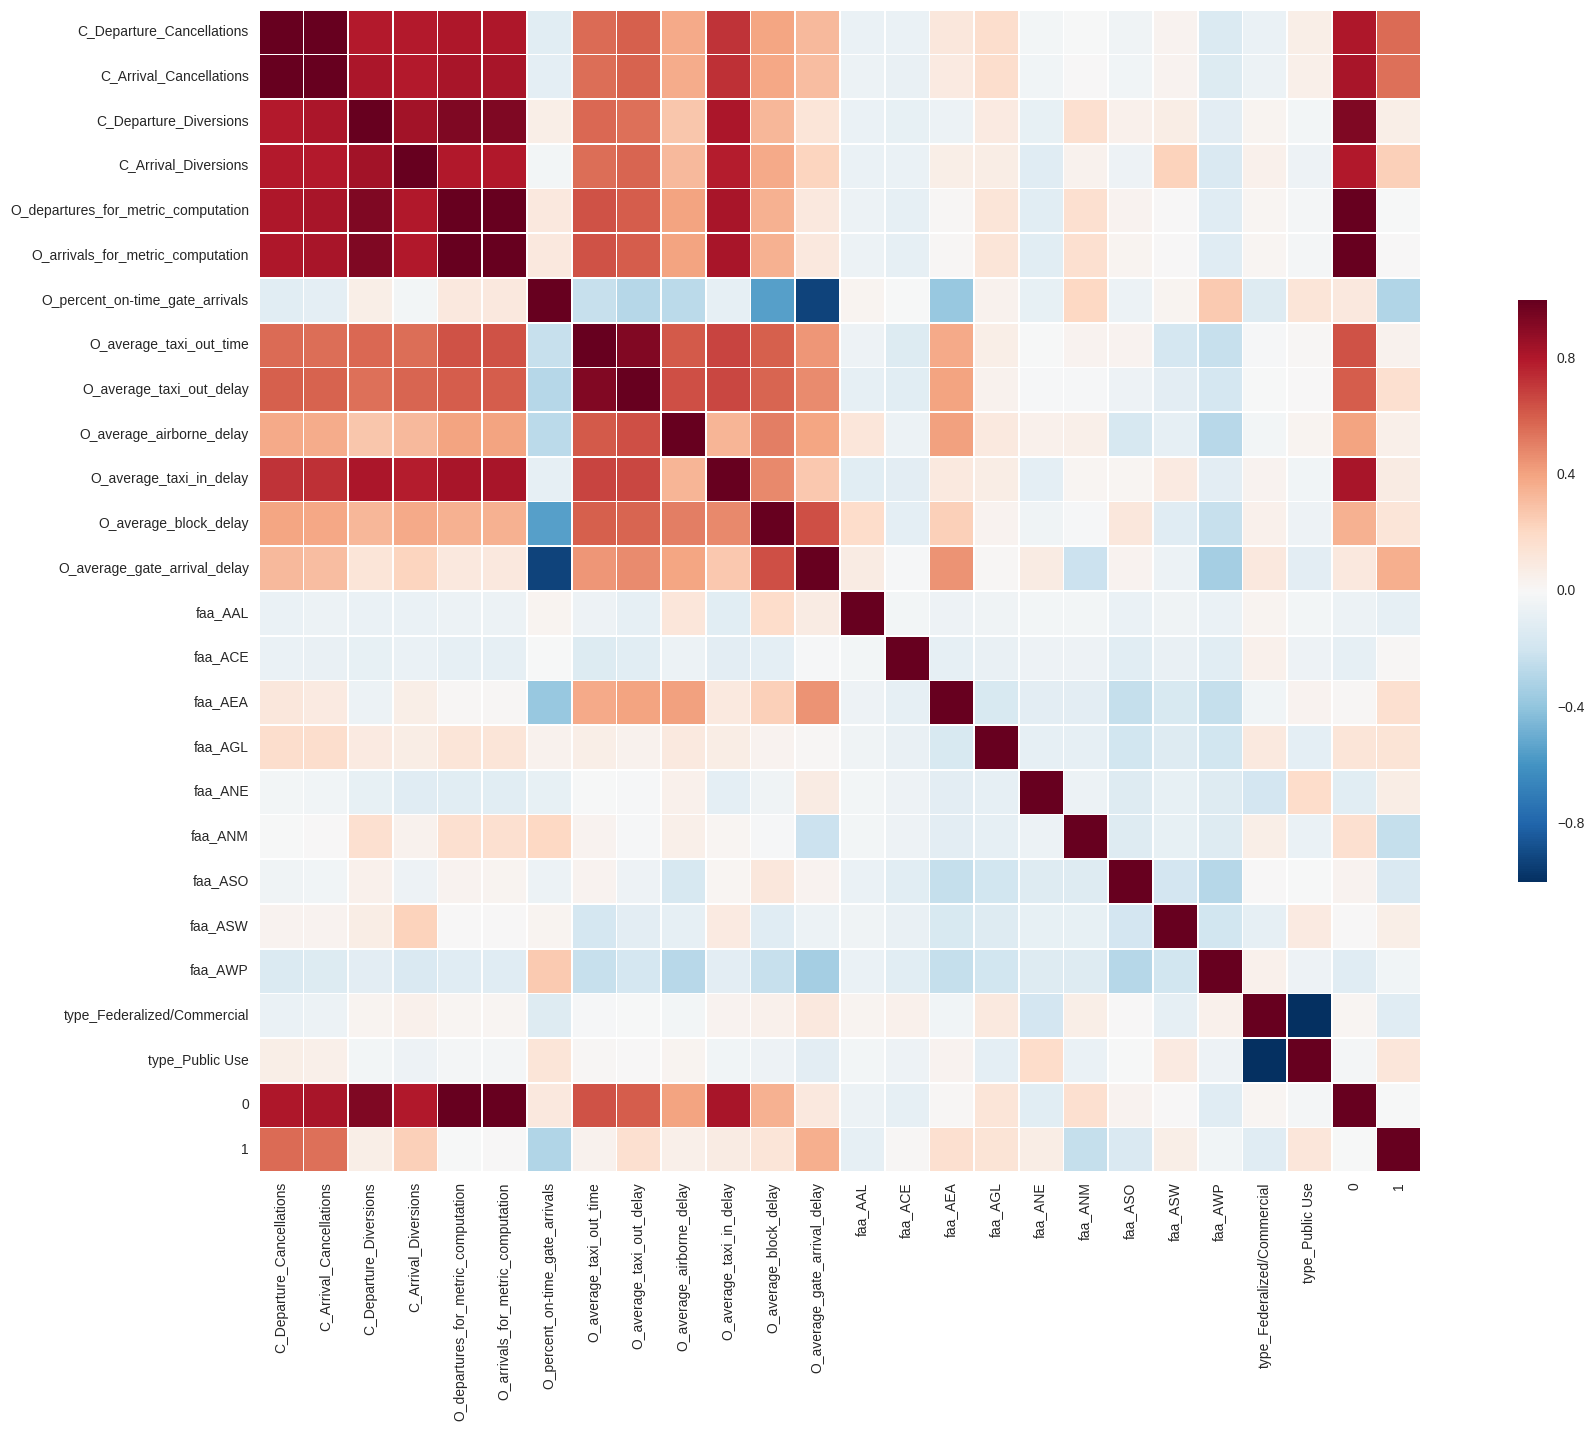

In [33]:
plt.figure(figsize=(25,15))
sns.heatmap(display_x.corr(), vmax=.3, square=True,
            linewidths=.5, cbar_kws={"shrink": .5})

In [34]:
x_train, x_test, y_train, y_test=train_test_split(x_pca, y, test_size=0.3)

In [35]:
params = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [None,1, 2, 3, 4, 5],
    'min_samples_split': [2, 10, 25, 50, 100],
#     'min_samples_leaf': [1, 2, 3, 4, 5, 10]
}
start_time = time.time()
rf_pca_2=evaluate_model(RandomForestRegressor(n_jobs=-1), x_train, y_train, params, draw_features=False)
print 'This operation took '+ str(time.time() - start_time) + " seconds"

Best Model after Grid Search:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Mean score of the model is: 0.30217350972
('Explained variance regression score: ', 0.42413532637721252)
Mean Absolute Error: 2.28654098767
This operation took 198.532234907 seconds


In [36]:
model_test_metrics(rf_pca_2, x_test, y_test)

Test Data score:  0.576482066441
('Explained variance regression score: ', 0.57701358278581738)
Mean Absolute Error: 2.23448689265


In [37]:
predictions=rf_pca_2.predict(x_test)

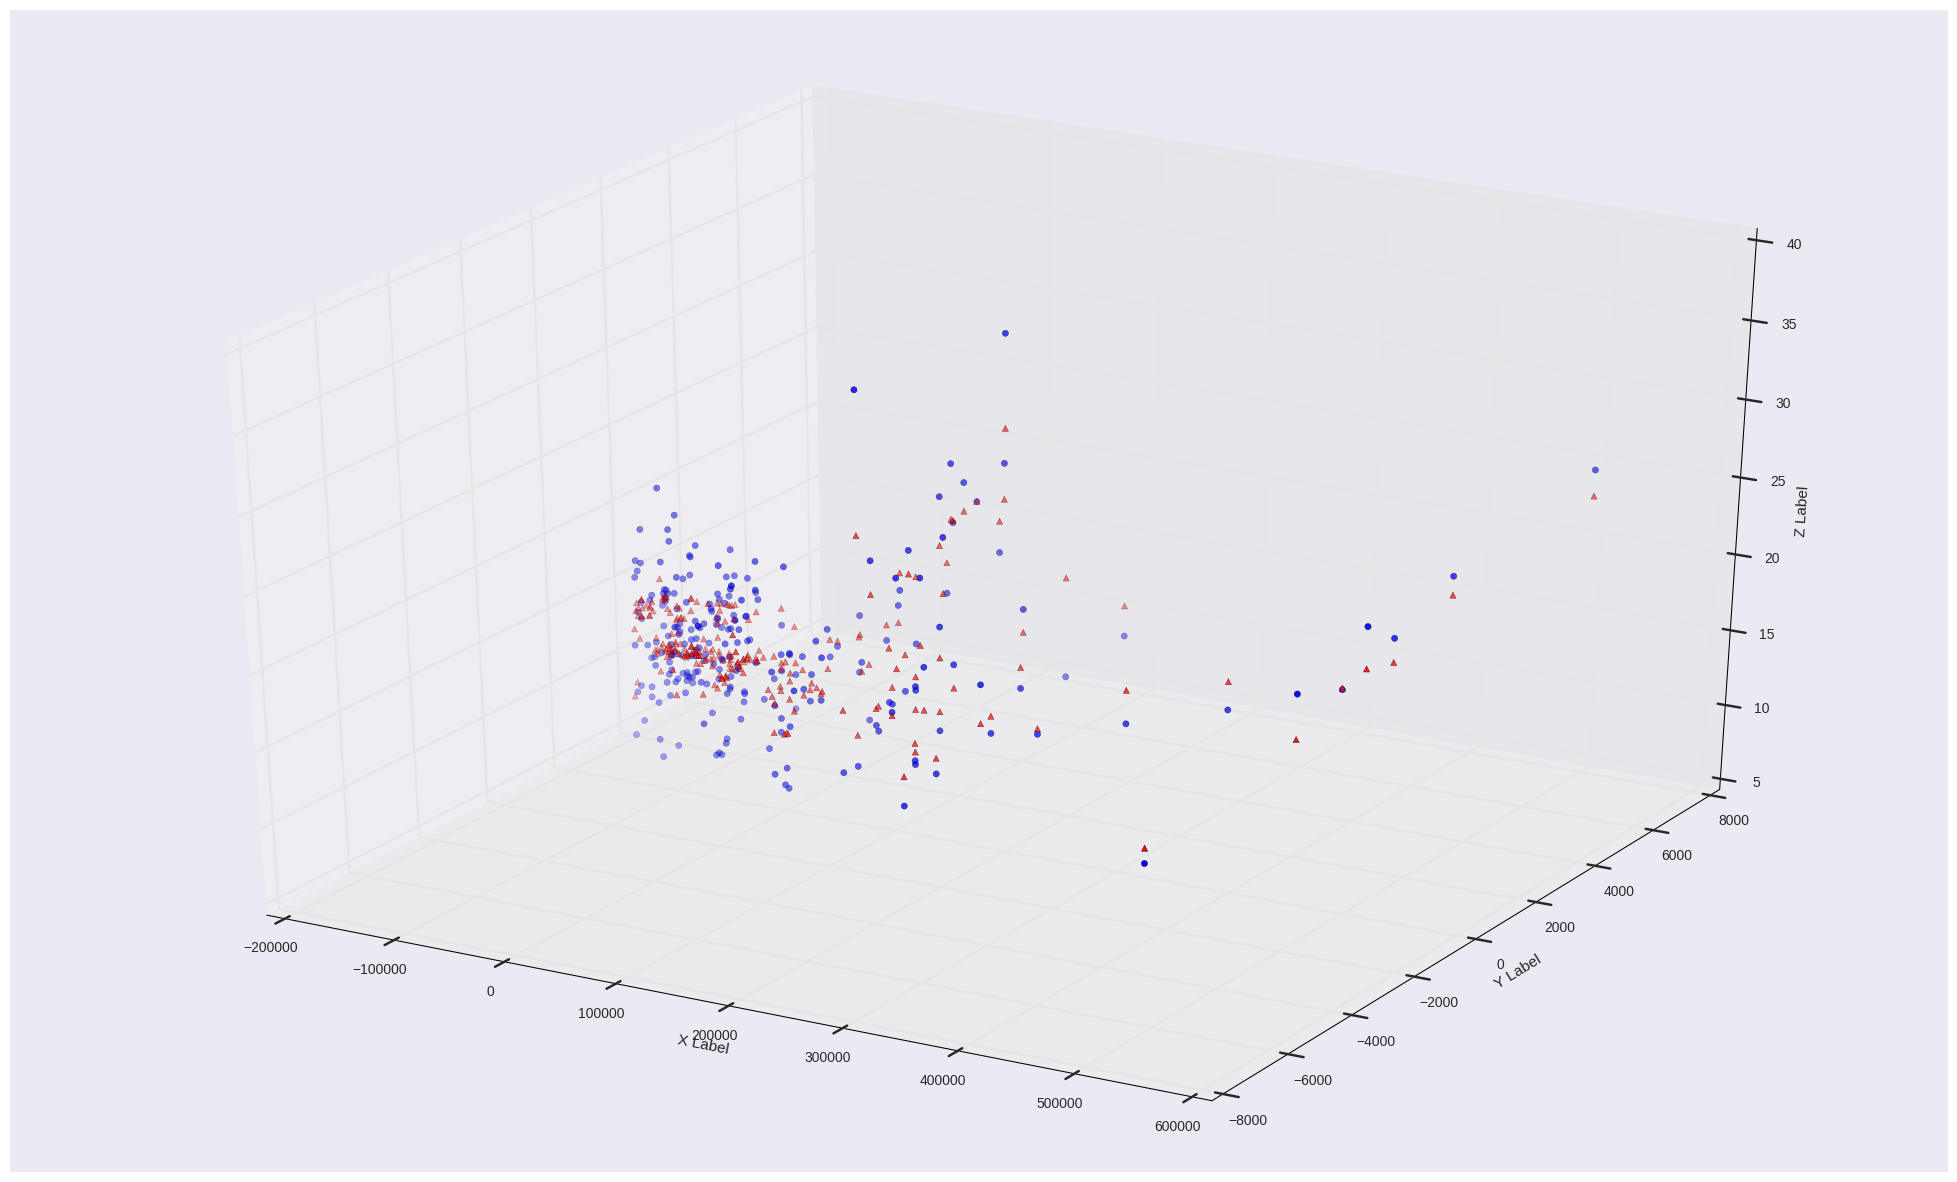

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111, projection='3d')
a=x_test[:,0]
b=x_test[:,1]
c=y_test
d=predictions
ax.scatter(a,b,c, c='b', marker='o')
ax.scatter(a,b,d, c='r', marker='^')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [39]:
params = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [None,1, 2, 3, 4, 5],
    'min_samples_split': [2, 10, 25, 50, 100],
}
start_time = time.time()
et_pca=evaluate_model(ExtraTreesRegressor(n_jobs=-1), x_train, y_train, params, draw_features=False)
print 'This operation took '+ str(time.time() - start_time) + " seconds"

Best Model after Grid Search:
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=10, min_weight_fraction_leaf=0.0,
          n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)
Mean score of the model is: 0.384520381245
('Explained variance regression score: ', 0.43840873041203021)
Mean Absolute Error: 2.27922480045
This operation took 187.728337049 seconds


In [40]:
model_test_metrics(et_pca, x_test, y_test)

Test Data score:  0.620757827063
('Explained variance regression score: ', 0.62075782706270044)
Mean Absolute Error: 2.03548931349


In [41]:
def find_best_n_components(data):
    x_standard = StandardScaler().fit_transform(data)
    cov_mat=np.cov(x_standard.T)
    eigenvalues, eigenvectors=np.linalg.eig(cov_mat)
    eigenValSum=sum(eigenvalues)
    varianceExplained=[(i/eigenValSum)*100 for i in sorted(eigenvalues, reverse=True)]
    cumulativeVarianceExplained=np.cumsum(varianceExplained)
    return cumulativeVarianceExplained

In [42]:
find_best_n_components(x)

array([  32.58072997,   45.25107368,   54.22811336,   60.10633639,
         65.54253378,   70.56703126,   75.36767034,   79.88855899,
         84.13182103,   88.31124643,   91.4089346 ,   94.0390597 ,
         95.72230263,   96.94703491,   98.02010808,   98.76231629,
         99.37037665,   99.64247374,   99.87029901,   99.99241877,
         99.99933537,  100.        ,  100.        ,  100.        ])

It seems `10` and `12` is the most reasonable number of components we can choose

In [70]:
pca=PCA(n_components=10)
x_pca=pca.fit_transform(x)
x_train, x_test, y_train, y_test=train_test_split(x_pca, y, test_size=0.3)
params = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [None,1, 2, 3, 4, 5],
    'min_samples_split': [2, 10, 25, 50, 100],
#     'min_samples_leaf': [1, 2, 3, 4, 5, 10]
}
start_time = time.time()
rf_pca_10=evaluate_model(RandomForestRegressor(n_jobs=-1), x_train, y_train, params, draw_features=False)
print 'This operation took '+ str(time.time() - start_time) + " seconds"

Best Model after Grid Search:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Mean score of the model is: 0.801629721779
('Explained variance regression score: ', 0.79344672821629281)
Mean Absolute Error: 1.37042
This operation took 196.964634895 seconds


In [71]:
model_test_metrics(rf_pca_10, x_test, y_test)

Test Data score:  0.971699335985
('Explained variance regression score: ', 0.97183308119432898)
Mean Absolute Error: 0.571407708333


In [72]:
pca=PCA(n_components=12)
x_pca=pca.fit_transform(x)
x_train, x_test, y_train, y_test=train_test_split(x_pca, y, test_size=0.3)
params = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [None,1, 2, 3, 4, 5],
    'min_samples_split': [2, 10, 25, 50, 100],
#     'min_samples_leaf': [1, 2, 3, 4, 5, 10]
}
start_time = time.time()
rf_pca_12=evaluate_model(RandomForestRegressor(n_jobs=-1), x_train, y_train, params, draw_features=False)
print 'This operation took '+ str(time.time() - start_time) + " seconds"

Best Model after Grid Search:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Mean score of the model is: 0.722701821406
('Explained variance regression score: ', 0.83293312845885337)
Mean Absolute Error: 1.3938125
This operation took 197.029016972 seconds


In [73]:
model_test_metrics(rf_pca_12, x_test, y_test)

Test Data score:  0.970315075984
('Explained variance regression score: ', 0.97041780039229575)
Mean Absolute Error: 0.569477083333


In [74]:
def best_results_with_components(model, data, target, params=None):
#     for n in range(1, len(data.columns)):
    best_score=0
    best_n=0
    best_model=None
    for n in range(2, len(data.columns)):
        pca=PCA(n_components=n)
        data_pca=pca.fit_transform(x)
        x_train, x_test, y_train, y_test=train_test_split(x_pca, y, test_size=0.3)
        model=evaluate_model(model, x_train, y_train, params, draw_features=False, verbose=False)
        score=model.fit(x_test, y_test).score(x_test, y_test)
        if score > best_score:
            best_score=score
            best_n=n
            best_model=model
    return (best_model, best_n)

In [77]:
params = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [None,1, 2, 3, 4, 5],
    'min_samples_split': [2, 10, 25, 50, 100],
#     'min_samples_leaf': [1, 2, 3, 4, 5, 10]
}
start_time = time.time()
model, n=best_results_with_components(RandomForestRegressor(n_jobs=-1), x, y)
print 'This operation took '+ str(time.time() - start_time) + " seconds"

This operation took 23.1944320202 seconds


In [78]:
print "Highest score for models acheived  with %s number of components" % n

Highest score for models acheived  with 15 number of components


In [79]:
model_test_metrics(model, x_test, y_test)

Test Data score:  0.961516031632
('Explained variance regression score: ', 0.96151695502631451)
Mean Absolute Error: 0.654904166667


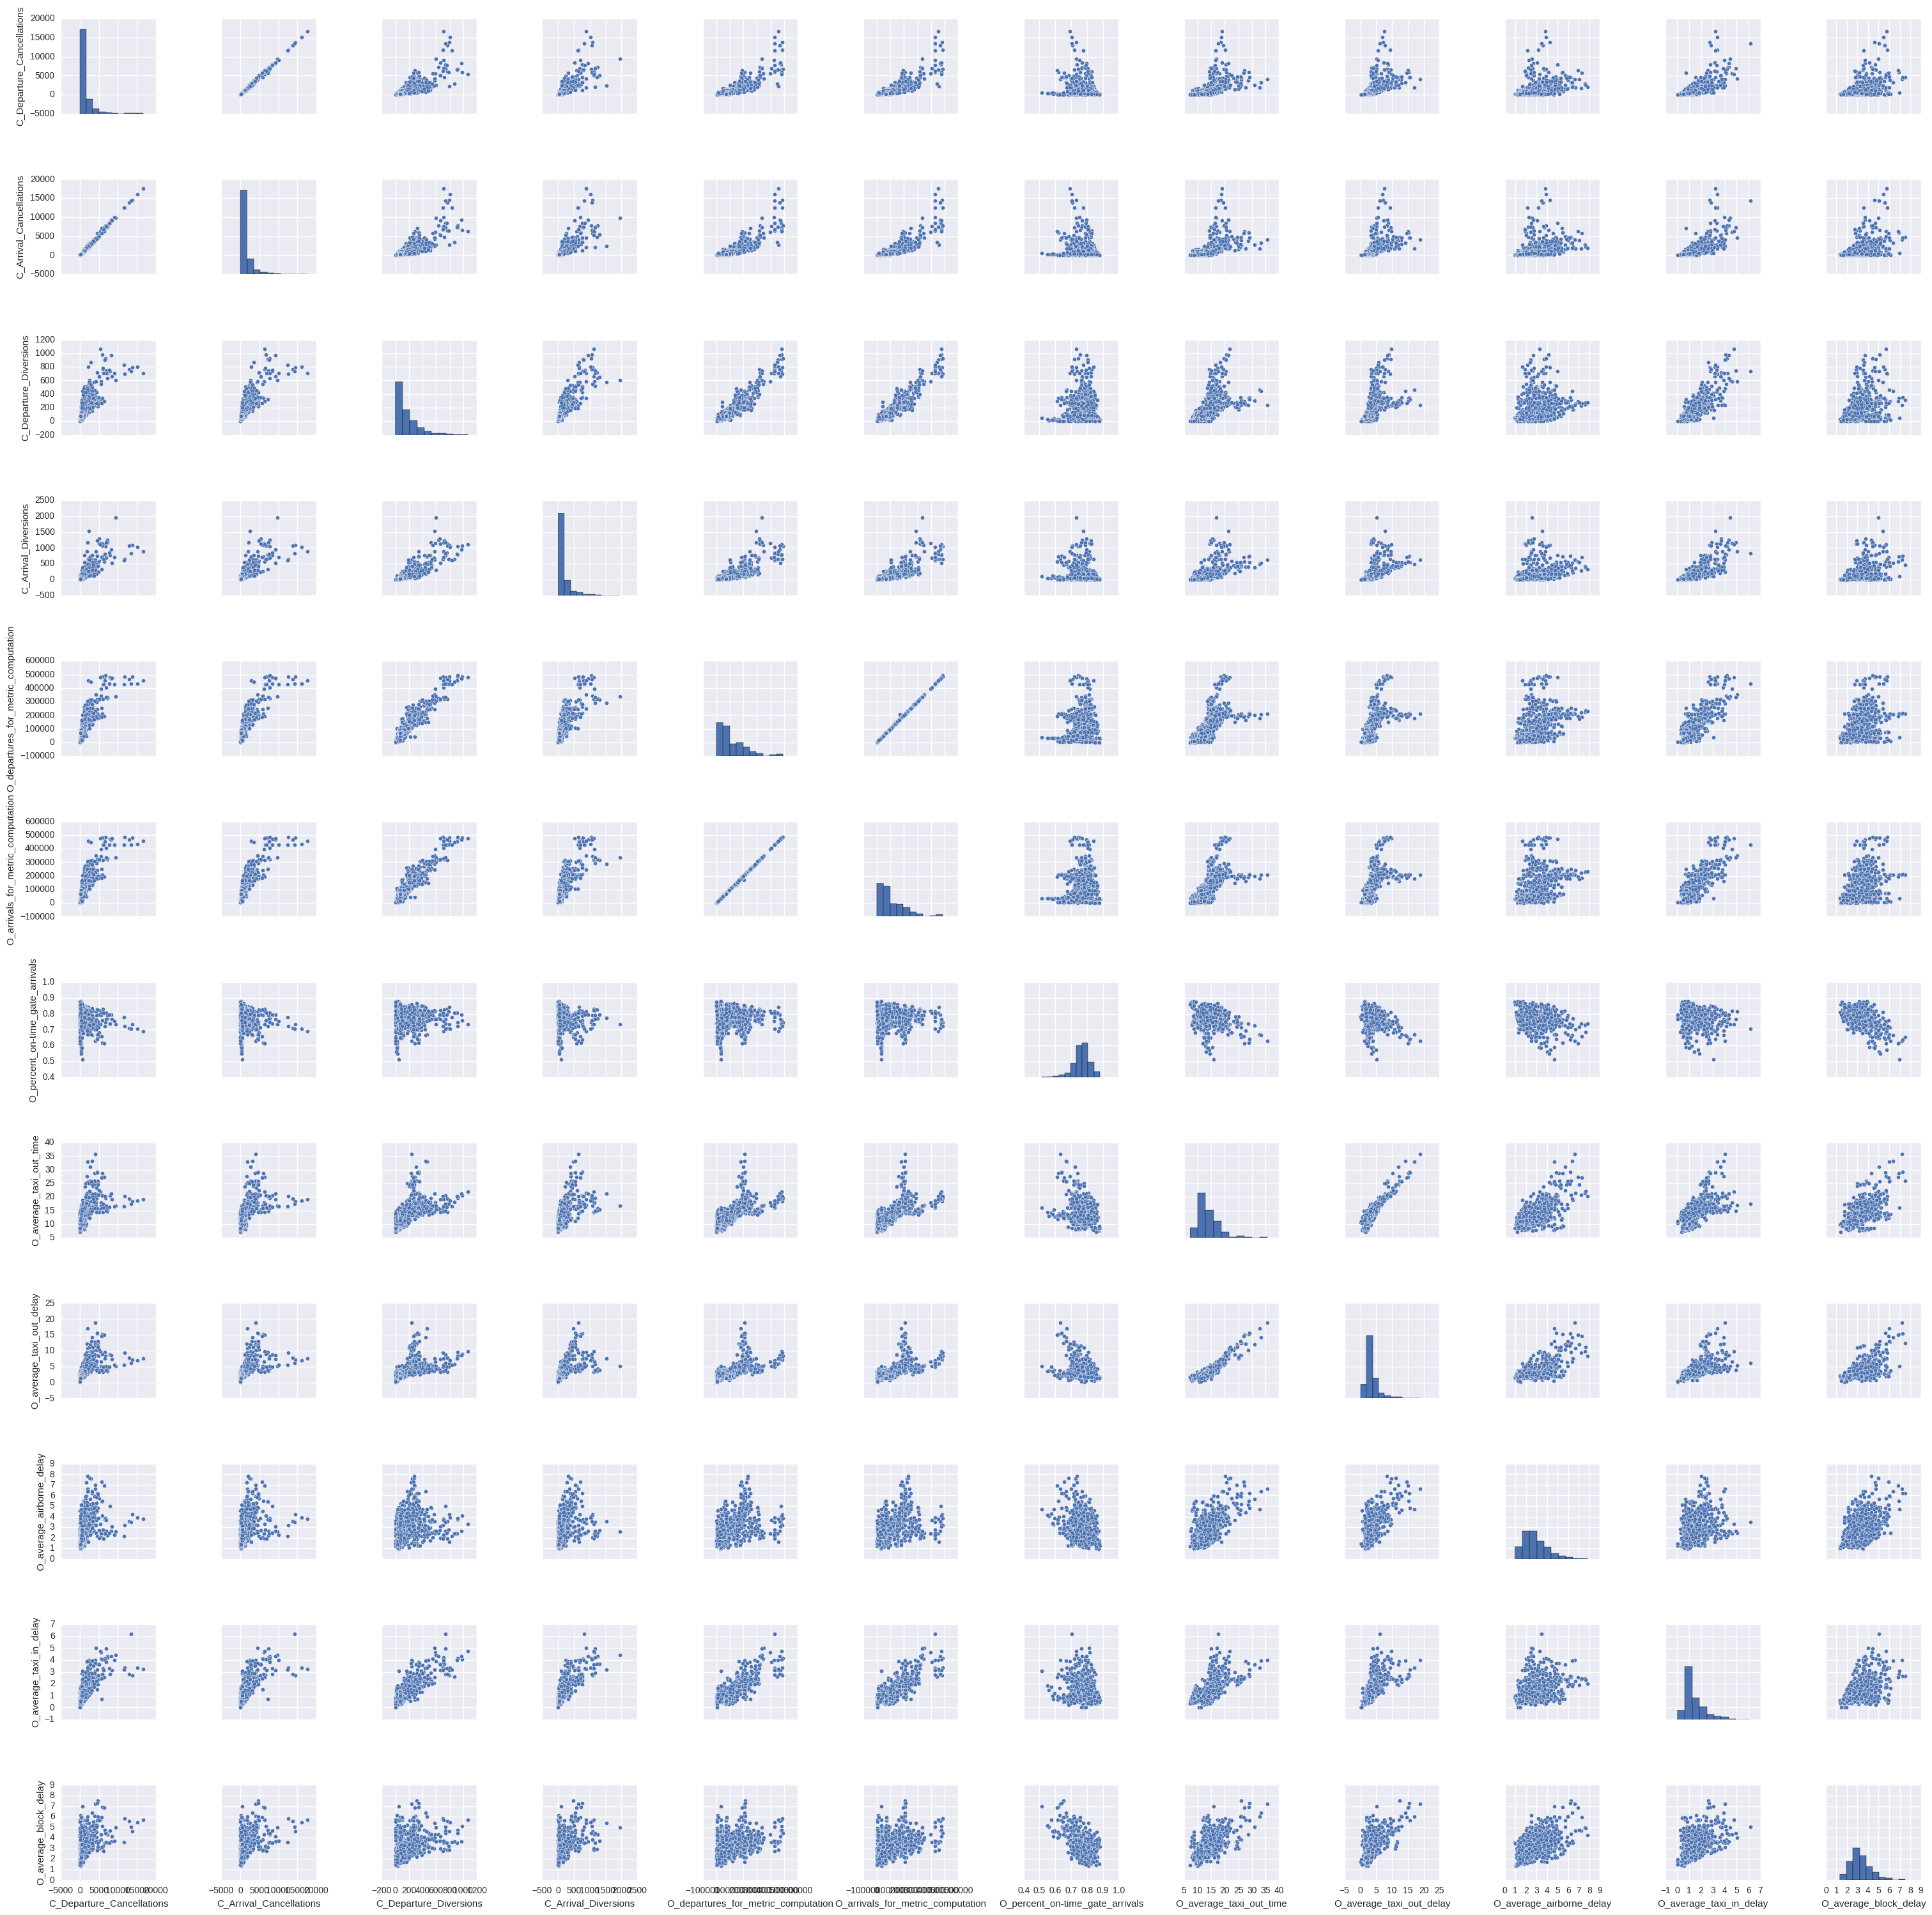

In [85]:
sns.pairplot(x.ix[:, 0:12])

In [137]:
x_standard = StandardScaler().fit_transform(x)

In [138]:
list_of_scores = []

for i in range(2, 25):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_standard)
    predictions = kmeans.predict(x_standard)
    sil = silhouette_score(x_standard, predictions)
    list_of_scores.append((i, sil))

In [139]:
list_of_scores

[(2, 0.31682093208098105),
 (3, 0.31611223579900322),
 (4, 0.15640014783534867),
 (5, 0.17014080837767309),
 (6, 0.16893823053072926),
 (7, 0.21871963956768584),
 (8, 0.23199405520258687),
 (9, 0.26734972910730126),
 (10, 0.31744542299763334),
 (11, 0.33693979025928739),
 (12, 0.40855030232288597),
 (13, 0.41344436590461081),
 (14, 0.42043877065788138),
 (15, 0.42675846206244655),
 (16, 0.4353577546465433),
 (17, 0.43537203166600064),
 (18, 0.43790191990044208),
 (19, 0.44625720749212783),
 (20, 0.43633281114544514),
 (21, 0.44130490565866221),
 (22, 0.42106325822116752),
 (23, 0.42376153377267201),
 (24, 0.4127399998940145)]

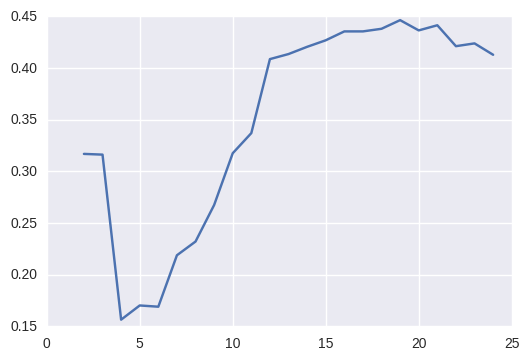

In [140]:
plt.plot([i[0] for i in list_of_scores],
        [i[1] for i in list_of_scores])

In [141]:
final_model = KMeans(n_clusters=10)
final_model.fit(x_standard)
set(final_model.labels_)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [142]:
x

,C_Departure_Cancellations,C_Arrival_Cancellations,C_Departure_Diversions,C_Arrival_Diversions,O_departures_for_metric_computation,O_arrivals_for_metric_computation,O_percent_on-time_gate_arrivals,O_average_taxi_out_time,O_average_taxi_out_delay,O_average_airborne_delay,...,faa_ACE,faa_AEA,faa_AGL,faa_ANE,faa_ANM,faa_ASO,faa_ASW,faa_AWP,type_Federalized/Commercial,type_Public Use
0,330.0,289.0,55.0,28.0,60371,56735,0.7984,13.84,2.27,1.88,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,315.0,282.0,64.0,36.0,57736,54870,0.7604,14.14,3.03,1.63,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,257.0,233.0,63.0,44.0,55707,52948,0.7611,15.75,4.28,1.73,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,307.0,278.0,70.0,42.0,47987,47246,0.7414,15.22,3.16,1.55,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,238.0,197.0,78.0,29.0,44493,43448,0.7533,14.22,1.85,1.64,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,199.0,159.0,57.0,58.0,48418,46678,0.7999,13.29,1.43,1.22,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,258.0,207.0,82.0,45.0,47314,45781,0.7719,13.04,1.39,1.65,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,240.0,201.0,101.0,55.0,42803,42401,0.7899,13.23,1.96,1.45,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,174.0,141.0,62.0,41.0,44716,43985,0.8181,13.15,1.82,1.41,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,127.0,94.0,65.0,64.0,42902,42175,0.7840,13.56,2.20,1.78,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [143]:
df=x.copy()

In [144]:
df['classes_final'] = pd.DataFrame(final_model.labels_)

In [145]:
df.head()

,C_Departure_Cancellations,C_Arrival_Cancellations,C_Departure_Diversions,C_Arrival_Diversions,O_departures_for_metric_computation,O_arrivals_for_metric_computation,O_percent_on-time_gate_arrivals,O_average_taxi_out_time,O_average_taxi_out_delay,O_average_airborne_delay,...,faa_AEA,faa_AGL,faa_ANE,faa_ANM,faa_ASO,faa_ASW,faa_AWP,type_Federalized/Commercial,type_Public Use,classes_final
0,330.0,289.0,55.0,28.0,60371,56735,0.7984,13.84,2.27,1.88,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3
1,315.0,282.0,64.0,36.0,57736,54870,0.7604,14.14,3.03,1.63,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3
2,257.0,233.0,63.0,44.0,55707,52948,0.7611,15.75,4.28,1.73,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3
3,307.0,278.0,70.0,42.0,47987,47246,0.7414,15.22,3.16,1.55,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3
4,238.0,197.0,78.0,29.0,44493,43448,0.7533,14.22,1.85,1.64,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3


In [146]:
df['classes_final'].value_counts()

3    269
0    132
1    125
2     55
5     51
7     44
6     44
4     35
9     33
8     11
Name: classes_final, dtype: int64

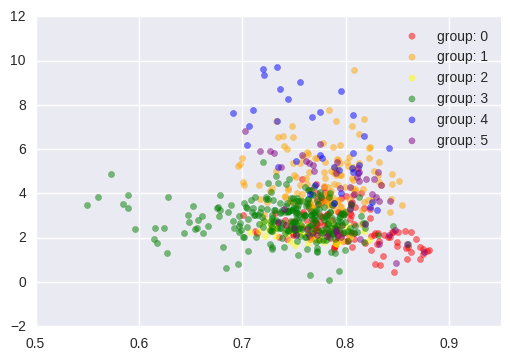

In [148]:
colors_in_graph = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown', 'cyan', 'magenta', 'grey']

for i in zip(range(0, 6), colors_in_graph):
    plt.scatter(df.loc[(df['classes_final'] == i[0]), 'O_percent_on-time_gate_arrivals'],
                df.loc[(df['classes_final'] == i[0]), 'O_average_taxi_out_delay'],
             color=i[1], 
             alpha=0.5,
            label='group: ' + str(i[0]))
plt.legend()